In [1]:
#Categorizing given email is spam or ham
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import time


dataset = pd.read_csv('spamham.csv')
dataset.head() 


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
dataset.columns

Index(['text', 'spam'], dtype='object')

In [6]:
dataset.shape

(5728, 2)

In [7]:
#Checking for duplicates and removing them
dataset.drop_duplicates(inplace = True)
dataset.shape  #(5695, 2)

(5695, 2)

In [8]:
dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [9]:
#Checking for any null entries in the dataset
print (pd.DataFrame(dataset.isnull().sum()))

      0
text  0
spam  0


In [10]:
#Checking class distribution
dataset.groupby('spam').count()

,text
spam,
0,4327
1,1368


In [11]:
dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [12]:
len(dataset.text)

5695

In [13]:
import numpy as np

# display a random document and label
idx = round(np.random.rand()*len(dataset.text))
print('--------Random Document---------')
print('================================')
print('Document Label: ',[dataset.spam[idx]])
print('================================')
print("\n".join(dataset.text[idx].split("\n")))

--------Random Document---------
Document Label:  [1]
Subject: breaking news : e - mail margin - bottom : 0 " >  e - mail  marketing system  -  bulk e - mail will make you money so fast , your head will spin !  - customers say we would no longer be in business without it  - new package deal includes everything you need .  see this product ' s web page  click  here  1  million business leads on cd  -  for telemarketing , mailing , or faxing this list is a gold mine !  - contains company name , address , phone , fax , sic , size .  - list allows for unlimited use .  see this product ' s web page click  here  fax  marketing system  -  fax broadcasting is the hot new way to market your business !  - people are 10 times more likely to read faxes than direct mail .  - software 4 million leads turns your computer into a fax blaster .  see this product ' s web page click  here  visit  our web site or call 618 - 288 - 6661  to be taken off of  our list click here 


array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

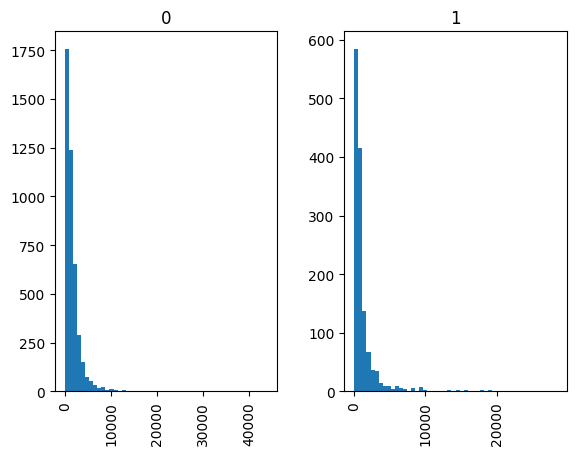

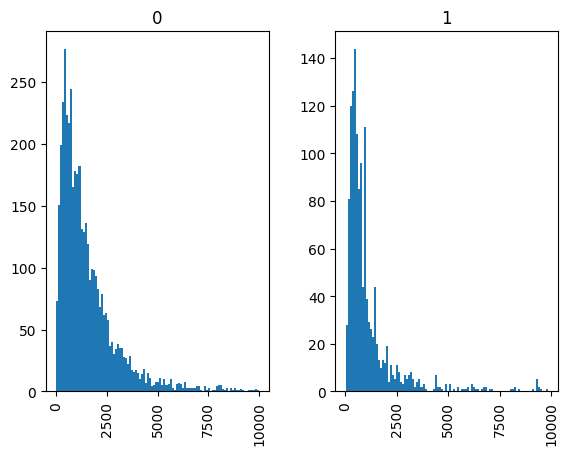

In [14]:
dataset['length'] = dataset['text'].map(lambda text: len(text))
#Let's plot histogram for length distribution by spam
dataset.hist(column='length', by='spam', bins=50)
#we can see some extreme outliers, we'll set a threshold for text length and plot the histogram again
dataset[dataset.length < 10000].hist(column='length', by='spam', bins=100)
#Using Natural Language Processing to cleaning the text to make one corpus


In [17]:
%%time
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_TOP_WORDS = None # use entire vocabulary!
MAX_ART_LEN = 250 # maximum and minimum number of words

#tokenize the text
tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(dataset.text)
# save as sequences with integers replacing words
sequences = tokenizer.texts_to_sequences(dataset.text)

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_ART_LEN)

y_ohe = dataset.spam
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y_ohe.shape)
print(np.max(X))

Found 37353 unique tokens. Distilled to 37353 top words.
Shape of data tensor: (5695, 250)
Shape of label tensor: (5695,)
37353
Wall time: 1.62 s
Found 37353 unique tokens. Distilled to 37353 top words.
Shape of data tensor: (5695, 250)
Shape of label tensor: (5695,)
37353
Wall time: 1.49 s


In [18]:
np.unique(y_ohe)

array([0, 1], dtype=int64)

In [19]:
len(X)

5695

In [20]:
np.unique(X)

array([    0,     1,     2, ..., 37347, 37348, 37353])

In [21]:
X.shape

(5695, 250)

In [22]:
X[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,    15,  5808, 12284,
          18,   520,  1782,  3908,    12,   463,   903,     2,  4410,
           5,   103,     1,   118,    12,   402,     4,  6299,     3,
           1,    68,  9194,    76,     5,   171,  4520,   840,  6060,
        6061,     3,  1684,   291,    23,   125,     1,  2162,   227,
        1853,    21,    60,    40,  2001,    17,  8015,  1711,     5,
        4305,    18,   103,    23, 11008,   688,     5,   405,  5809,
          27,  6573,  8016,    17,   488,   171,   347,   876,    78,
         855,     3,

In [26]:
!pip install imblearn


  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     -------------------------------------- 225.4/225.4 kB 4.6 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


Is any y value is NaN: False


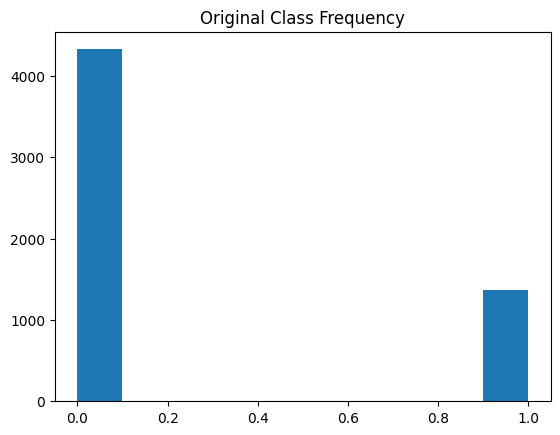

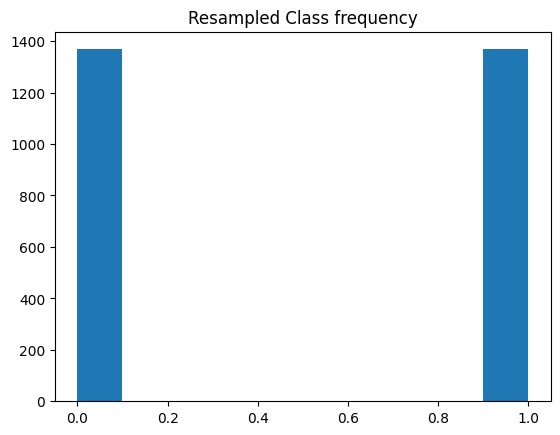

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Use undersampling to make every 
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y_ohe)
print(f'Is any y value is NaN: {np.isnan(y_ohe).any()}')

plt.hist(y_ohe)
plt.title("Original Class Frequency")
plt.show()

plt.hist(y_resampled)
plt.title("Resampled Class frequency")
plt.show()



X_train Shape: (2188, 250) Label Shape: (2188,)


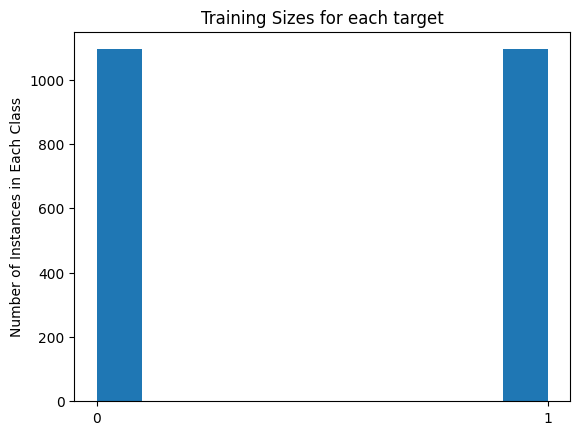

In [28]:
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from matplotlib import pyplot as plt
%matplotlib inline

# Split it into train / test subsets
X_train, X_test, y_train_ohe, y_test_ohe = train_test_split(X_resampled, y_resampled, test_size=0.2,
                                                            stratify=y_resampled,
                                                            random_state=42)
NUM_CLASSES = 1

# print some stats of the data
print("X_train Shape:",X_train.shape, "Label Shape:", y_train_ohe.shape)
uniq_classes = np.sum(y_train_ohe,axis=0)
plt.hist(y_train_ohe)
plt.ylabel("Number of Instances in Each Class")

new_list = range(math.floor(min(y_test_ohe)), math.ceil(max(y_test_ohe))+1)
plt.xticks(new_list)
plt.title("Training Sizes for each target")


plt.show()


Text(0, 0.5, 'Number of Instances in Each Class')

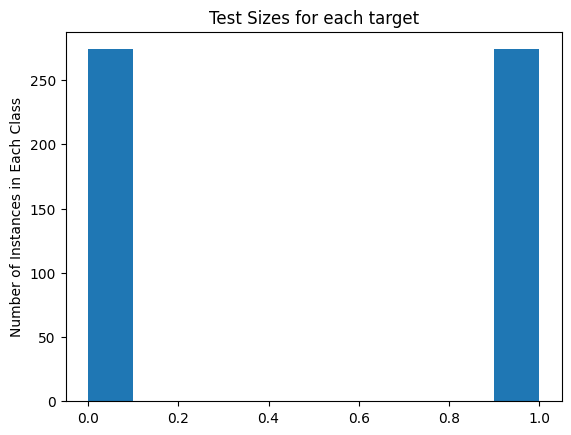

In [29]:
uniq_classes = np.sum(y_test_ohe,axis=0)
plt.hist(y_test_ohe)
plt.title("Test Sizes for each target")
plt.ylabel("Number of Instances in Each Class")


##  Creating simple RNN model

In [30]:
# show example without the FOR loop
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, SimpleRNN
from tensorflow.keras.layers import Embedding

EMBED_SIZE = 50
RNN_STATESIZE = 100
rnns = []
input_holder = Input(shape=(X_train.shape[1], ))
shared_embed = Embedding(top_words, # input dimension (max int of OHE)
                EMBED_SIZE, # output dimension size
                input_length=MAX_ART_LEN)(input_holder) # number of words in each sequence


x = SimpleRNN(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
simple_rnn_model = Model(inputs=input_holder,outputs=x)

In [32]:
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import tensorflow as tf

# create LSTM
x = LSTM(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
lstm_model = Model(inputs=input_holder,outputs=x)

# create GRU
x = GRU(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)
gru_model = Model(inputs=input_holder,outputs=x)

# lr_schedule = ExponentialDecay(
#     initial_learning_rate=0.1,
#     decay_steps=10000,
#     decay_rate=0.95) 

opt = Adam(learning_rate=0.0001, epsilon=0.00005, clipnorm=1.0)

simple_rnn_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=[tf.keras.metrics.Recall()])

lstm_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=[tf.keras.metrics.Recall()])

gru_model.compile(loss='binary_crossentropy', 
              optimizer= opt, 
              metrics=[tf.keras.metrics.Recall()])

print(simple_rnn_model.summary())
print(lstm_model.summary())
print(gru_model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250)]             0         
                                                                 
 embedding (Embedding)       (None, 250, 50)           1867650   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               15100     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,882,851
Trainable params: 1,882,851
Non-trainable params: 0
_________________________________________________________________
None
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        

## history_lstm

In [34]:
# takes about 2 hours to run
#simple_rnn_model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))
history_lstm=lstm_model.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test, y_test_ohe))
#gru_model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/8
69/69 [==============================] - 31s 447ms/step - loss: 0.6905 - recall_4: 0.7349 - val_loss: 0.6884 - val_recall_4: 0.7226
Epoch 2/8
69/69 [==============================] - 31s 443ms/step - loss: 0.6846 - recall_4: 0.7605 - val_loss: 0.6792 - val_recall_4: 0.7883
Epoch 3/8
69/69 [==============================] - 30s 441ms/step - loss: 0.5964 - recall_4: 0.8876 - val_loss: 0.4923 - val_recall_4: 0.9307
Epoch 4/8
69/69 [==============================] - 31s 452ms/step - loss: 0.3671 - recall_4: 0.9022 - val_loss: 0.3160 - val_recall_4: 0.9343
Epoch 5/8
69/69 [==============================] - 31s 446ms/step - loss: 0.2374 - recall_4: 0.9433 - val_loss: 0.2171 - val_recall_4: 0.9562
Epoch 6/8
69/69 [==============================] - 32s 464ms/step - loss: 0.1362 - recall_4: 0.9781 - val_loss: 0.1754 - val_recall_4: 0.9562
Epoch 7/8
69/69 [==============================] - 32s 459ms/step - loss: 0.0986 - recall_4: 0.9872 - val_loss: 0.1844 - val_recall_4: 0.9562
Epoch 

In [35]:
history_gru=gru_model.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test, y_test_ohe))

Epoch 1/8
69/69 [==============================] - 33s 436ms/step - loss: 0.6668 - recall_5: 0.8501 - val_loss: 0.6381 - val_recall_5: 0.8796
Epoch 2/8
69/69 [==============================] - 29s 420ms/step - loss: 0.4464 - recall_5: 0.9369 - val_loss: 0.1447 - val_recall_5: 0.9708
Epoch 3/8
69/69 [==============================] - 29s 422ms/step - loss: 0.0774 - recall_5: 0.9872 - val_loss: 0.0929 - val_recall_5: 0.9854
Epoch 4/8
69/69 [==============================] - 32s 457ms/step - loss: 0.0581 - recall_5: 0.9890 - val_loss: 0.1397 - val_recall_5: 0.9489
Epoch 5/8
69/69 [==============================] - 31s 444ms/step - loss: 0.0460 - recall_5: 0.9899 - val_loss: 0.0676 - val_recall_5: 0.9745
Epoch 6/8
69/69 [==============================] - 30s 436ms/step - loss: 0.0373 - recall_5: 0.9890 - val_loss: 0.0636 - val_recall_5: 0.9854
Epoch 7/8
69/69 [==============================] - 29s 423ms/step - loss: 0.0223 - recall_5: 0.9991 - val_loss: 0.0628 - val_recall_5: 0.9708
Epoch 

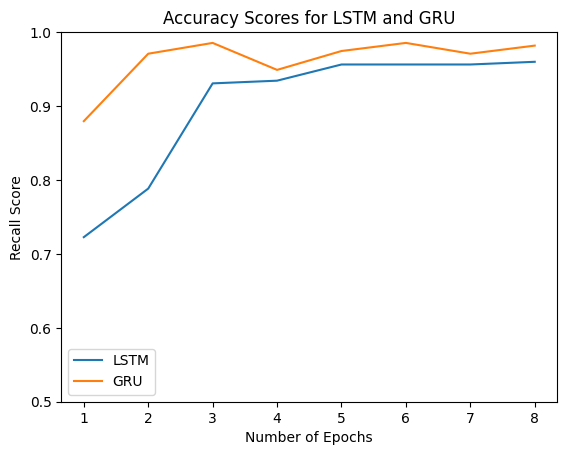

In [38]:
import matplotlib.pyplot as plt
gru_acc=history_gru.history['val_recall_5']
lstm_acc=history_lstm.history['val_recall_4']
epoch=[1,2,3,4,5,6,7,8]
plt.plot(epoch,lstm_acc)
plt.plot(epoch,gru_acc)
plt.title('Accuracy Scores for LSTM and GRU')
plt.ylim([0.5, 1])
plt.ylim([0.5, 1])
plt.ylim([0.5, 1])
plt.xlabel('Number of Epochs')
plt.ylabel('Recall Score')
#new_list = range(math.floor(0, 6)
plt.xticks([1,2,3,4,5,6,7,8])
plt.legend(["LSTM", "GRU"])

##

In [43]:
# Import the Concatenate layer from Keras
from keras.layers import Concatenate

x = GRU(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)
x = Dense(NUM_CLASSES, activation='sigmoid')(x)

# Add the second GRU layer
x2 = GRU(RNN_STATESIZE, dropout=0.2, recurrent_dropout=0.2)(shared_embed)

# Concatenate the outputs of the first and second GRU layers
x = Concatenate()([x, x2])

# Add the final dense layer
x = Dense(NUM_CLASSES, activation='sigmoid')(x)

# Create the model
gru_model_2 = Model(inputs=input_holder,outputs=x)

gru_model_2.compile(loss='binary_crossentropy',
              optimizer= opt,
              metrics=[tf.keras.metrics.Recall()])

print(gru_model_2.summary())

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 250, 50)      1867650     ['input_1[0][0]']                
                                                                                                  
 gru_7 (GRU)                    (None, 100)          45600       ['embedding[0][0]']              
                                                                                                  
 dense_8 (Dense)                (None, 1)            101         ['gru_7[0][0]']                  
                                                                                            

In [44]:
history_gru_2=gru_model_2.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test, y_test_ohe))

Epoch 1/8
69/69 [==============================] - 56s 741ms/step - loss: 0.6389 - recall_7: 0.9534 - val_loss: 0.5652 - val_recall_7: 0.8321
Epoch 2/8
69/69 [==============================] - 53s 767ms/step - loss: 0.3540 - recall_7: 0.9250 - val_loss: 0.1809 - val_recall_7: 0.9526
Epoch 3/8
69/69 [==============================] - 65s 947ms/step - loss: 0.0449 - recall_7: 0.9973 - val_loss: 0.0800 - val_recall_7: 0.9818
Epoch 4/8
69/69 [==============================] - 64s 928ms/step - loss: 0.0335 - recall_7: 0.9927 - val_loss: 0.0648 - val_recall_7: 0.9891
Epoch 5/8
69/69 [==============================] - 53s 770ms/step - loss: 0.0215 - recall_7: 0.9991 - val_loss: 0.0564 - val_recall_7: 0.9927
Epoch 6/8
69/69 [==============================] - 53s 768ms/step - loss: 0.0210 - recall_7: 0.9954 - val_loss: 0.0635 - val_recall_7: 0.9927
Epoch 7/8
69/69 [==============================] - 53s 772ms/step - loss: 0.0187 - recall_7: 0.9982 - val_loss: 0.0557 - val_recall_7: 0.9854
Epoch 

## Getting GloVe Weights

In [50]:
%%time
EMBED_SIZE = 100
# the embed size should match the file you load glove from
embeddings_index = {}
f = open(r'C:\\Users\\ataer\\Downloads\\Compressed\\glove.6B\\glove.6B.100d.txt',"r", encoding="utf-8")
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (37354, 100) 
 Total words found: 26405 
 Percentage: 70.68854741125449
Wall time: 10.3 s


In [52]:
from tensorflow.keras.layers import Embedding

# save this embedding now
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)

## GRU Model with Glove

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

gru_model_3 = Sequential()
gru_model_3.add(embedding_layer)
gru_model_3.add(GRU(100,dropout=0.2, recurrent_dropout=0.2))
gru_model_3.add(Dense(NUM_CLASSES, activation='sigmoid'))
gru_model_3.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=[tf.keras.metrics.Recall()])
print(gru_model_3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 100)          3735400   
                                                                 
 gru_9 (GRU)                 (None, 100)               60600     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 3,796,101
Trainable params: 60,701
Non-trainable params: 3,735,400
_________________________________________________________________
None


In [55]:
# Start the timer
start_time = time.time()

history_gru_3 = gru_model_3.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test,y_test_ohe))

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time_numberbatch = end_time - start_time

Epoch 1/8
69/69 [==============================] - 31s 414ms/step - loss: 0.5692 - recall_8: 0.7569 - val_loss: 0.4933 - val_recall_8: 0.7591
Epoch 2/8
69/69 [==============================] - 29s 420ms/step - loss: 0.4525 - recall_8: 0.7971 - val_loss: 0.4292 - val_recall_8: 0.8102
Epoch 3/8
69/69 [==============================] - 29s 424ms/step - loss: 0.3493 - recall_8: 0.8629 - val_loss: 0.4973 - val_recall_8: 0.6533
Epoch 4/8
69/69 [==============================] - 30s 428ms/step - loss: 0.2570 - recall_8: 0.8985 - val_loss: 0.2267 - val_recall_8: 0.9635
Epoch 5/8
69/69 [==============================] - 30s 439ms/step - loss: 0.2003 - recall_8: 0.9305 - val_loss: 0.1960 - val_recall_8: 0.9124
Epoch 6/8
69/69 [==============================] - 31s 450ms/step - loss: 0.1980 - recall_8: 0.9424 - val_loss: 0.2228 - val_recall_8: 0.8832
Epoch 7/8
69/69 [==============================] - 30s 432ms/step - loss: 0.1864 - recall_8: 0.9378 - val_loss: 0.3611 - val_recall_8: 0.7883
Epoch 

## Getting ConceptNet NumberBatch Weights

In [59]:
%%time
EMBED_SIZE = 300
# the embed size should match the file you load glove from
embeddings_index = {}
f = open(r'C:\\Users\\ataer\\Downloads\\Compressed\\glove.6B\\numberbatch-en.txt',"r", encoding="utf-8")
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 516783 word vectors.
Embedding Shape: (37354, 300) 
 Total words found: 22661 
 Percentage: 60.66552444182685
Wall time: 38.7 s


In [60]:
from tensorflow.keras.layers import Embedding

# save this embedding now
embedding_layer = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)

## GRU Model with NumberBatch Weights

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

gru_model_numberbatch = Sequential()
gru_model_numberbatch.add(embedding_layer)
gru_model_numberbatch.add(GRU(300,dropout=0.2, recurrent_dropout=0.2))
gru_model_numberbatch.add(Dense(NUM_CLASSES, activation='sigmoid'))
gru_model_numberbatch.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=[tf.keras.metrics.Recall()])
print(gru_model_numberbatch.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 300)          11206200  
                                                                 
 gru_10 (GRU)                (None, 300)               541800    
                                                                 
 dense_11 (Dense)            (None, 1)                 301       
                                                                 
Total params: 11,748,301
Trainable params: 542,101
Non-trainable params: 11,206,200
_________________________________________________________________
None


In [62]:
# Start the timer
start_time = time.time()

history_gru_numberbatch = gru_model_numberbatch.fit(X_train, y_train_ohe, epochs=8, batch_size=32, validation_data=(X_test,y_test_ohe))

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time_numberbatch = end_time - start_time

Epoch 1/8
69/69 [==============================] - 70s 976ms/step - loss: 0.6215 - recall_9: 0.8355 - val_loss: 0.5193 - val_recall_9: 0.7701
Epoch 2/8
69/69 [==============================] - 68s 989ms/step - loss: 0.3182 - recall_9: 0.8684 - val_loss: 0.2761 - val_recall_9: 0.9051
Epoch 3/8
69/69 [==============================] - 69s 999ms/step - loss: 0.2230 - recall_9: 0.9388 - val_loss: 0.1417 - val_recall_9: 0.9854
Epoch 4/8
69/69 [==============================] - 70s 1s/step - loss: 0.1919 - recall_9: 0.9497 - val_loss: 0.1826 - val_recall_9: 0.9891
Epoch 5/8
69/69 [==============================] - 71s 1s/step - loss: 0.1500 - recall_9: 0.9616 - val_loss: 0.1606 - val_recall_9: 0.9453
Epoch 6/8
69/69 [==============================] - 69s 1s/step - loss: 0.1517 - recall_9: 0.9598 - val_loss: 0.1296 - val_recall_9: 0.9927
Epoch 7/8
69/69 [==============================] - 70s 1s/step - loss: 0.1149 - recall_9: 0.9707 - val_loss: 0.1163 - val_recall_9: 0.9781
Epoch 8/8
69/69 [=